<a href="https://colab.research.google.com/github/marcinwolter/MyRepo/blob/master/cov_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SARS-Covid-19 w Polsce
# by WB, MW updated Apr 9 2020

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


Dane z https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv

In [0]:
# PL
poland= [1,1,5,5,11,16,22,31,49,68,103,119,177,238,251,355,425,536,634,749,901,1051,1221,1389,1638,1862,2055,2311,2554,2946,3383,3627,4102,4413,4848,5205]

In [0]:
# IT
it = [2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,20,62,155,229,322,453,655,888,1128,1694,2036,2502,3089,3858,4636,5883,7375,9172,10149,12462,12462,17660,
      21157,24747,27980,31506,35713,41035,47021,53578,59138,63927,69176,74386,80589,
      86498,92472,97689,101739,105792,110574,115242,119827,124632,128948,132547,135586,139422]

In [0]:
pol =poland
#pol = it
text = " Polsce "
#text = " Włoszech"
maxplot = 2.5
#maxplot = 1.5

In [0]:
dz = [i for i in range(0,len(pol)) ]
dzit = [i for i in range(0,len(it)) ]

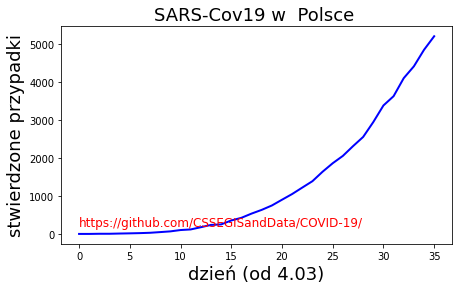

In [431]:
fig=plt.figure(figsize=(7,4))
plt.plot(pol, color='blue', lw=2)
plt.xlabel('dzień (od 4.03)',fontsize=18)
plt.ylabel('stwierdzone przypadki',fontsize=18)
plt.title('SARS-Cov19 w '+text,fontsize=18)
plt.text(x=0,y=200,s='https://github.com/CSSEGISandData/COVID-19/',fontsize=12, color='red')
plt.show()
fig.savefig("raw.jpg",bbox_inches="tight");

## W skali logarytmicznej 

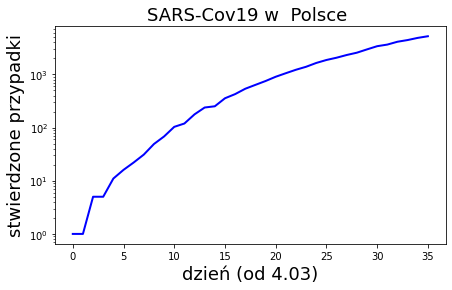

In [432]:
fig=plt.figure(figsize=(7,4))
plt.plot(pol, color='blue', lw=2)
plt.yscale('log')
plt.xlabel('dzień (od 4.03)',fontsize=18)
plt.ylabel('stwierdzone przypadki',fontsize=18)
plt.title('SARS-Cov19 w '+text,fontsize=18)
plt.show()
fig.savefig("log.jpg",bbox_inches="tight");

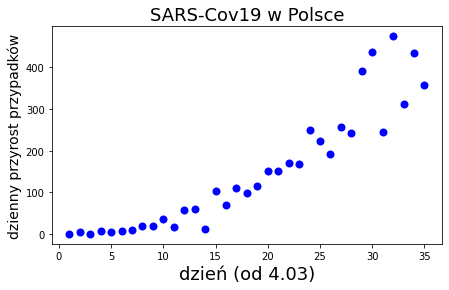

In [433]:
dpol=[pol[i+1]-pol[i] for i in range(0,len(pol)-1) ]
day= [i+1 for i in range(0,len(pol)-1) ]

fig=plt.figure(figsize=(7,4))
plt.scatter(day, dpol, color='blue', lw=2)
plt.xlabel('dzień (od 4.03)',fontsize=18)
plt.ylabel('dzienny przyrost przypadków',fontsize=14)
plt.title('SARS-Cov19 w Polsce',fontsize=18)
plt.show()
fig.savefig("przyrost.jpg",bbox_inches="tight");

## Czynnik przyrostu to iloraz liczby przypadków w danym dniu do liczby przypadków w dniu poprzednim

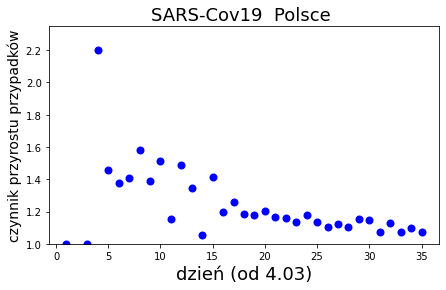

In [434]:
from statistics import mean

fpol=[pol[i+1]/pol[i] for i in range(0,len(pol)-1) ]

fig=plt.figure(figsize=(7,4))
plt.scatter(day, fpol, color='blue', lw=2)
plt.xlabel('dzień (od 4.03)',fontsize=18)
plt.ylabel('czynnik przyrostu przypadków',fontsize=14)
plt.title('SARS-Cov19 '+text,fontsize=18)
plt.ylim(1.0,2.*mean(fpol[10:]))
plt.show()
fig.savefig("czynnik.jpg",bbox_inches="tight");

## Czas (w dniach), po jakim liczba przypadków się podwaja

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in double_scalars
  """Entry point for launching an IPython kernel.


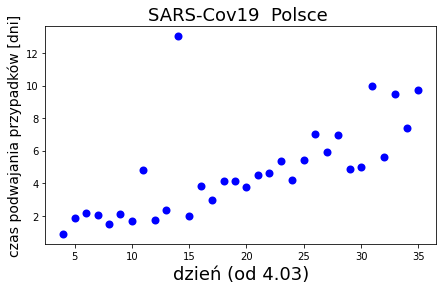

In [435]:
cza=[1./(np.log(fpol)[i]/np.log(2)) for i in range(2,len(fpol))]
day2= [i+1 for i in range(2,len(pol)-1) ]

fig=plt.figure(figsize=(7,4))
plt.scatter(day2, cza, color='blue', lw=2)
plt.xlabel('dzień (od 4.03)',fontsize=18)
plt.ylabel('czas podwajania przypadków [dni]',fontsize=14)
plt.title('SARS-Cov19 '+text,fontsize=18)
plt.show()
fig.savefig("czas.jpg",bbox_inches="tight");

In [0]:
def fu(t, N, k, t0):
     return N/(1+ np.exp(-k*k *(t-t0*t0)))

# differential of NORMAL logistic f'(x)=f(x)*(1-f(x)) 
def fu_prime(t, N, k, t0):
     F = (k*k*N*np.exp(-k*k*(t - t0*t0)))/(np.exp(-k*k*(t - t0*t0)) + 1)**2
     #F = 1./(1+ np.exp(-k*k *(t-t0*t0)))
     return F   #N*k*k*F*(1.-F)     

In [437]:
popt, pcov = curve_fit(fu, dz, pol,  p0=(30000, -0.5, -0.5), bounds=((30, -1,-10), (150000., 1.,30)))
# , bounds=((30000, -3,-50), (90000., 3.,50))
print(popt)
print(pcov)




[ 8.46323704e+03 -4.20104199e-01  5.69419294e+00]
[[1.25562422e+05 1.57199282e+00 1.48597386e+01]
 [1.57199282e+00 2.36487545e-05 1.91343008e-04]
 [1.48597386e+01 1.91343008e-04 1.77980321e-03]]


In [438]:

print(popt)

# Create mask (boolean array) of values outside of your exclusion region
dpol = np.array(dpol)
day = np.array(day)
mask = (dpol > 150) 
print(dpol)
print(dpol[mask])
print(day)
print(day[mask])

popt_prime, pcov_prime = curve_fit(fu_prime, day[mask], dpol[mask], sigma=np.sqrt(dpol[mask]),  p0=popt, bounds=((0.8*popt[0], -1,-20), (1.2*popt[0], 1.,20)))
# , bounds=((30000, -3,-50), (90000., 3.,50))
print(popt_prime)
print(pcov_prime)

[ 8.46323704e+03 -4.20104199e-01  5.69419294e+00]
[  0   4   0   6   5   6   9  18  19  35  16  58  61  13 104  70 111  98
 115 152 150 170 168 249 224 193 256 243 392 437 244 475 311 435 357]
[152 170 168 249 224 193 256 243 392 437 244 475 311 435 357]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35]
[20 22 23 24 25 26 27 28 29 30 31 32 33 34 35]
[ 1.01558845e+04 -3.82735890e-01  5.93012238e+00]
[[2.27658526e+07 3.21012769e+02 1.99300927e+03]
 [3.21012769e+02 4.80396015e-03 2.77087301e-02]
 [1.99300927e+03 2.77087301e-02 1.80706469e-01]]


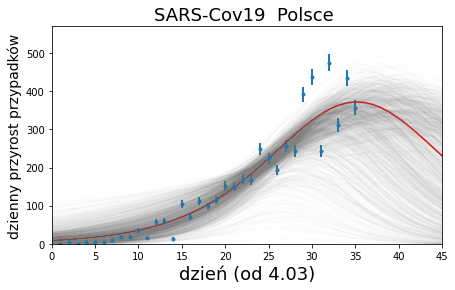

In [439]:
dpol=[pol[i+1]-pol[i] for i in range(0,len(pol)-1) ]
day= [i+1 for i in range(0,len(pol)-1) ]

fig=plt.figure(figsize=(7,4))
#plt.scatter(day, dpol, color='blue', lw=2)
plt.errorbar(day, dpol, yerr=np.sqrt(dpol), fmt='.', lw=2)
plt.xlabel('dzień (od 4.03)',fontsize=18)
plt.ylabel('dzienny przyrost przypadków',fontsize=14)
plt.title('SARS-Cov19 '+text,fontsize=18)

ra=[i for i in range(0,len(pol)+10)]
plt.plot(ra, fu_prime(ra, *popt_prime),'r-',label='f. logistyczna')

plt.ylim(0,1.2*max(dpol))
plt.xlim(0,len(ra)-1)

# Now we plot the distribution of possible functions
N = 1000
prand_prime = np.random.multivariate_normal(popt_prime, pcov_prime, N).T

for i in range(0, N): 
    aux = prand[:i]  
    plt.plot(ra, fu_prime(ra,prand_prime[0][i],prand_prime[1][i],prand_prime[2][i]), '-', color='gray', alpha=0.02)


plt.show()
fig.savefig("przyrost.jpg",bbox_inches="tight");

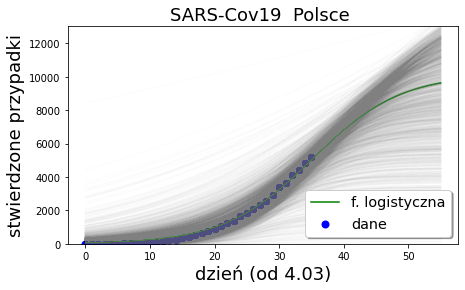

In [440]:
fig=plt.figure(figsize=(7,4))
# plt.yscale('log')

plt.scatter(dz, pol, color='blue', lw=2,label='dane')
plt.xlabel('dzień (od 4.03)',fontsize=18)
plt.ylabel('stwierdzone przypadki',fontsize=18)
plt.title('SARS-Cov19 '+text,fontsize=18)

ra=[i for i in range(0,len(pol)+20)]

#plt.plot(ra, fu(ra, *popt),'r-',label='f. logistyczna')
plt.plot(ra, fu(ra, *popt_prime),'green',label='f. logistyczna')
plt.legend(loc='lower right', shadow=True, fontsize='x-large')

x1,x2,y1,y2 = plt.axis()

plt.axis((x1,x2,0,maxplot*max(pol)))


# Now we plot the distribution of possible functions
N = 2000
#prand = np.random.multivariate_normal(popt, pcov, N).T
prand_prime = np.random.multivariate_normal(popt_prime, pcov_prime, N).T

for i in range(0, N): 
    aux = prand[:i]  
    #plt.plot(ra, fu(ra,prand[0][i],prand[1][i],prand[2][i]), '-', color='gray', alpha=0.02)
    plt.plot(ra, fu(ra,prand_prime[0][i],prand_prime[1][i],prand_prime[2][i]), '-', color='gray', alpha=0.02)


plt.show()
fig.savefig("fit_PL.jpg",bbox_inches="tight");
